# Problem Statment

### This hackathon will try to address the challenges of banking telecallers when they call blindly to people in order to sell term deposit plans. The aim of this hackathon is to find the most accurate prediction of whether a person to be called will subscribe to the term deposit plan or not using any of the machine learning algorithms. The participants can use the historical data that consists of different features of customers and whether they subscribed to the plan or not. Using this data, the participants need to build a machine learning model in order to make predictions.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize']=[15,10]
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape,test.shape

((21000, 17), (9000, 16))

In [5]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_bool
0,51,admin.,married,tertiary,no,148,no,no,cellular,15,apr,263,2,-1,0,unknown,0
1,55,blue-collar,married,secondary,no,7160,yes,no,unknown,4,may,315,1,-1,0,unknown,0
2,65,blue-collar,divorced,tertiary,no,2197,yes,no,cellular,12,may,102,2,-1,0,unknown,0
3,25,admin.,married,secondary,no,6658,yes,no,cellular,16,feb,197,1,-1,0,unknown,1
4,36,services,married,secondary,no,1761,yes,no,cellular,19,sep,177,1,-1,0,success,0


In [6]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,36,technician,divorced,secondary,no,1842,yes,yes,cellular,5,aug,149,1,-1,0,unknown
1,26,management,married,primary,no,165,no,no,cellular,7,nov,44,2,-1,0,unknown
2,50,management,married,unknown,no,5006,yes,no,cellular,7,may,664,2,-1,0,other
3,56,management,married,secondary,no,5122,no,no,cellular,9,aug,53,2,-1,0,unknown
4,26,blue-collar,married,tertiary,no,151,no,no,unknown,1,jul,67,5,130,0,unknown


<AxesSubplot:>

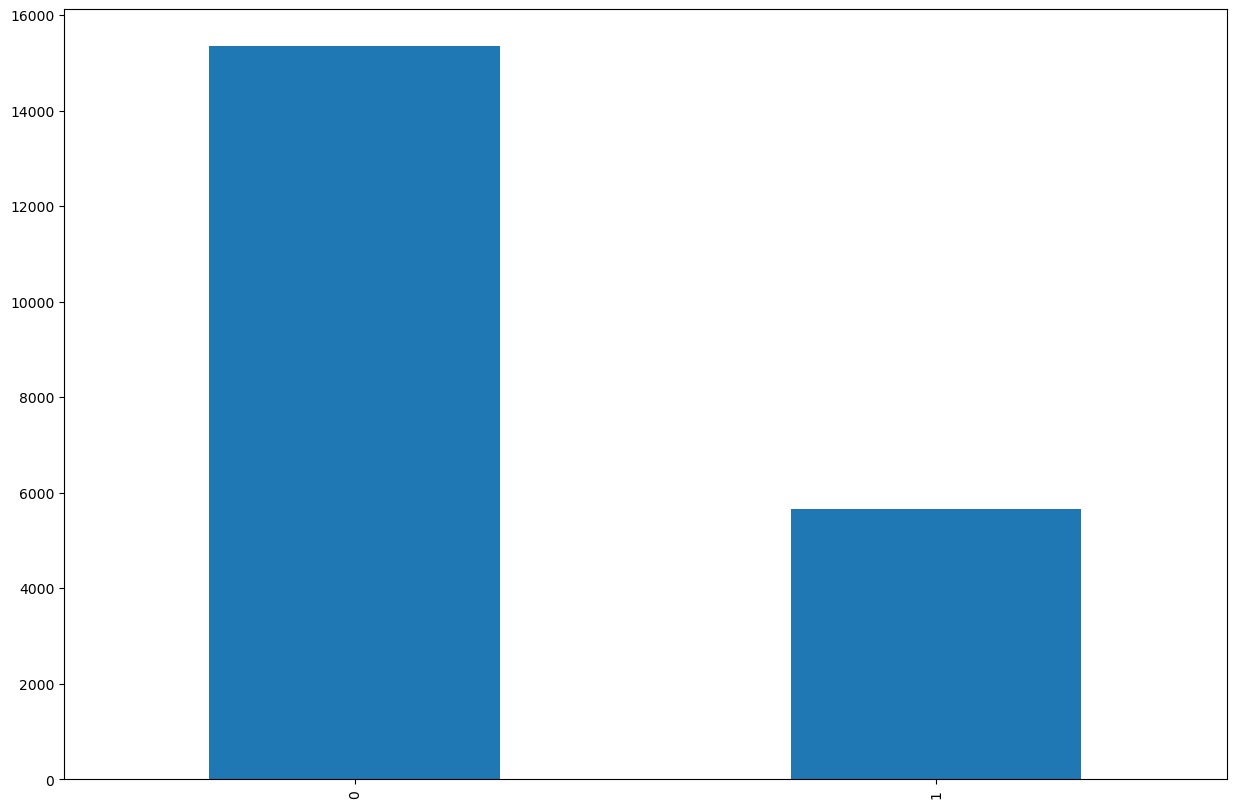

In [7]:
### Target Valraible...

train.y_bool.value_counts().plot(kind='bar')

In [8]:
combined = pd.concat([train, test], ignore_index= True)

In [9]:
combined.job.unique()

array(['admin.', 'blue-collar', 'services', 'self-employed', 'technician',
       'management', 'unknown', 'unemployed', 'retired', 'housemaid',
       'entrepreneur', 'student'], dtype=object)

### Lets bin the profession...

In [10]:
#Let bin the profession...
def prof(x):
    if x in ['unknown','unemployed','retired','student']:
        return('unemployed')
    elif x in ['admin.','entrepreneur','self-employed','management']:
        return('employed')
    elif x in ['blue-collar','services','technician','housemaid']:
        return('blue-collar')
    else:
        return(x)

In [11]:
combined['profession']=combined.job.apply(prof)

In [12]:
combined.profession.unique()

array(['employed', 'blue-collar', 'unemployed'], dtype=object)

In [13]:
combined

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_bool,profession
0,51,admin.,married,tertiary,no,148,no,no,cellular,15,apr,263,2,-1,0,unknown,0.0,employed
1,55,blue-collar,married,secondary,no,7160,yes,no,unknown,4,may,315,1,-1,0,unknown,0.0,blue-collar
2,65,blue-collar,divorced,tertiary,no,2197,yes,no,cellular,12,may,102,2,-1,0,unknown,0.0,blue-collar
3,25,admin.,married,secondary,no,6658,yes,no,cellular,16,feb,197,1,-1,0,unknown,1.0,employed
4,36,services,married,secondary,no,1761,yes,no,cellular,19,sep,177,1,-1,0,success,0.0,blue-collar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,38,blue-collar,single,tertiary,yes,1704,no,no,cellular,24,aug,167,2,-1,0,unknown,NaN,blue-collar
29996,52,technician,divorced,primary,no,557,no,no,cellular,24,nov,590,4,-1,0,unknown,NaN,blue-collar
29997,30,blue-collar,single,tertiary,no,374,yes,yes,unknown,1,apr,146,2,-1,0,unknown,NaN,blue-collar
29998,41,admin.,married,secondary,no,168,no,no,unknown,13,apr,143,1,88,0,unknown,NaN,employed


In [14]:
tbl=pd.crosstab(combined.profession,combined.y_bool)

import scipy.stats as stats
teststats,pvalue,df,exp_freq = stats.chi2_contingency(tbl)

In [15]:
print(pvalue)

0.8881338829532087


<AxesSubplot:xlabel='profession'>

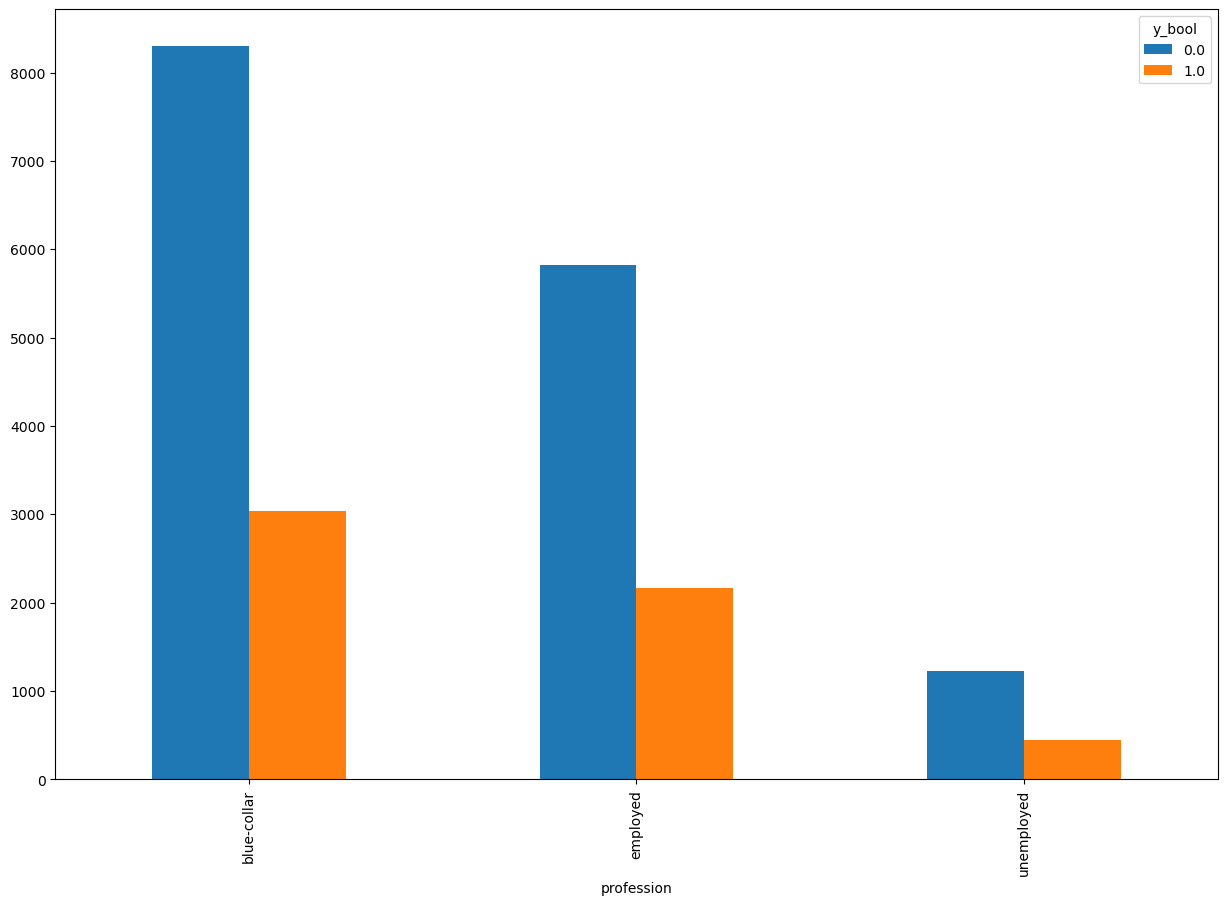

In [16]:
tbl.plot(kind='bar')

In [17]:
cat_cols = combined.select_dtypes(include='object').columns

In [18]:
for i in cat_cols:
    if len(combined.loc[:,i].unique())<=3:
        print(i)

marital
default
housing
loan
contact
profession


In [19]:
combined.education.unique()

array(['tertiary', 'secondary', 'primary', 'unknown'], dtype=object)

In [20]:
combined.loc[combined.education=='unknown','profession'].value_counts()

blue-collar    861
employed       628
unemployed     126
Name: profession, dtype: int64

In [21]:
combined.groupby('education')['profession'].value_counts()

education  profession 
primary    blue-collar    1742
           employed       1177
           unemployed      254
secondary  blue-collar    8227
           employed       5785
           unemployed     1192
tertiary   blue-collar    5335
           employed       3851
           unemployed      822
unknown    blue-collar     861
           employed        628
           unemployed      126
Name: profession, dtype: int64

In [22]:
combined.poutcome.unique()

array(['unknown', 'success', 'failure', 'other'], dtype=object)

In [23]:
pd.DataFrame(combined.groupby('poutcome')['y_bool'].value_counts(normalize = True)).T

poutcome   failure               other             success            \
y_bool         0.0       1.0       0.0       1.0       0.0       1.0   
y_bool    0.742012  0.257988  0.732836  0.267164  0.689922  0.310078   

poutcome   unknown            
y_bool         0.0       1.0  
y_bool    0.729178  0.270822

### Applying CHI-Square Test to verify the Important Cat Variables

In [24]:
signif = []

for i in cat_cols:
    tbl = pd.crosstab(combined.loc[:,i],combined.y_bool)
    teststats,pvalue,df,exp_freq = stats.chi2_contingency(tbl)
    if pvalue<0.05:
        signif.append(i)
print(signif)

['job']


In [25]:
# List of Num vars....
num_cols = combined.select_dtypes(include=np.number).columns

In [26]:
len(num_cols)

8

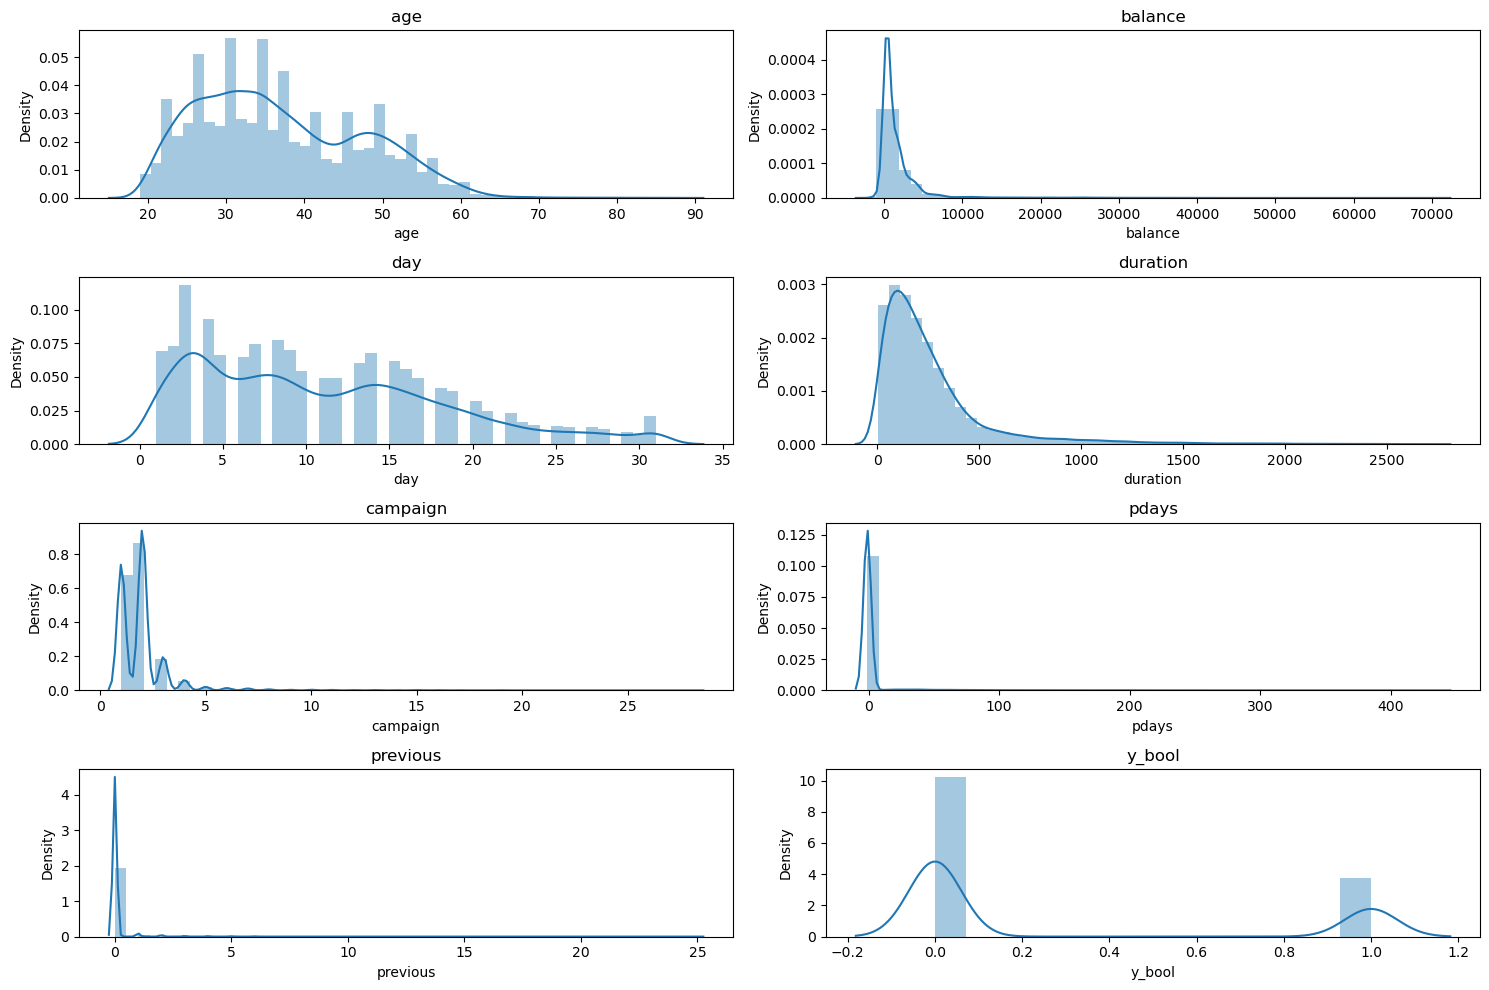

In [27]:
iterator = 1
for i in num_cols:
    plt.subplot(4,2,iterator)
    sns.distplot(combined.loc[:,i])
    plt.title(i)
    iterator+=1
    
plt.tight_layout()
plt.show()

- Log Transformation on Numerical Variables only...
- 

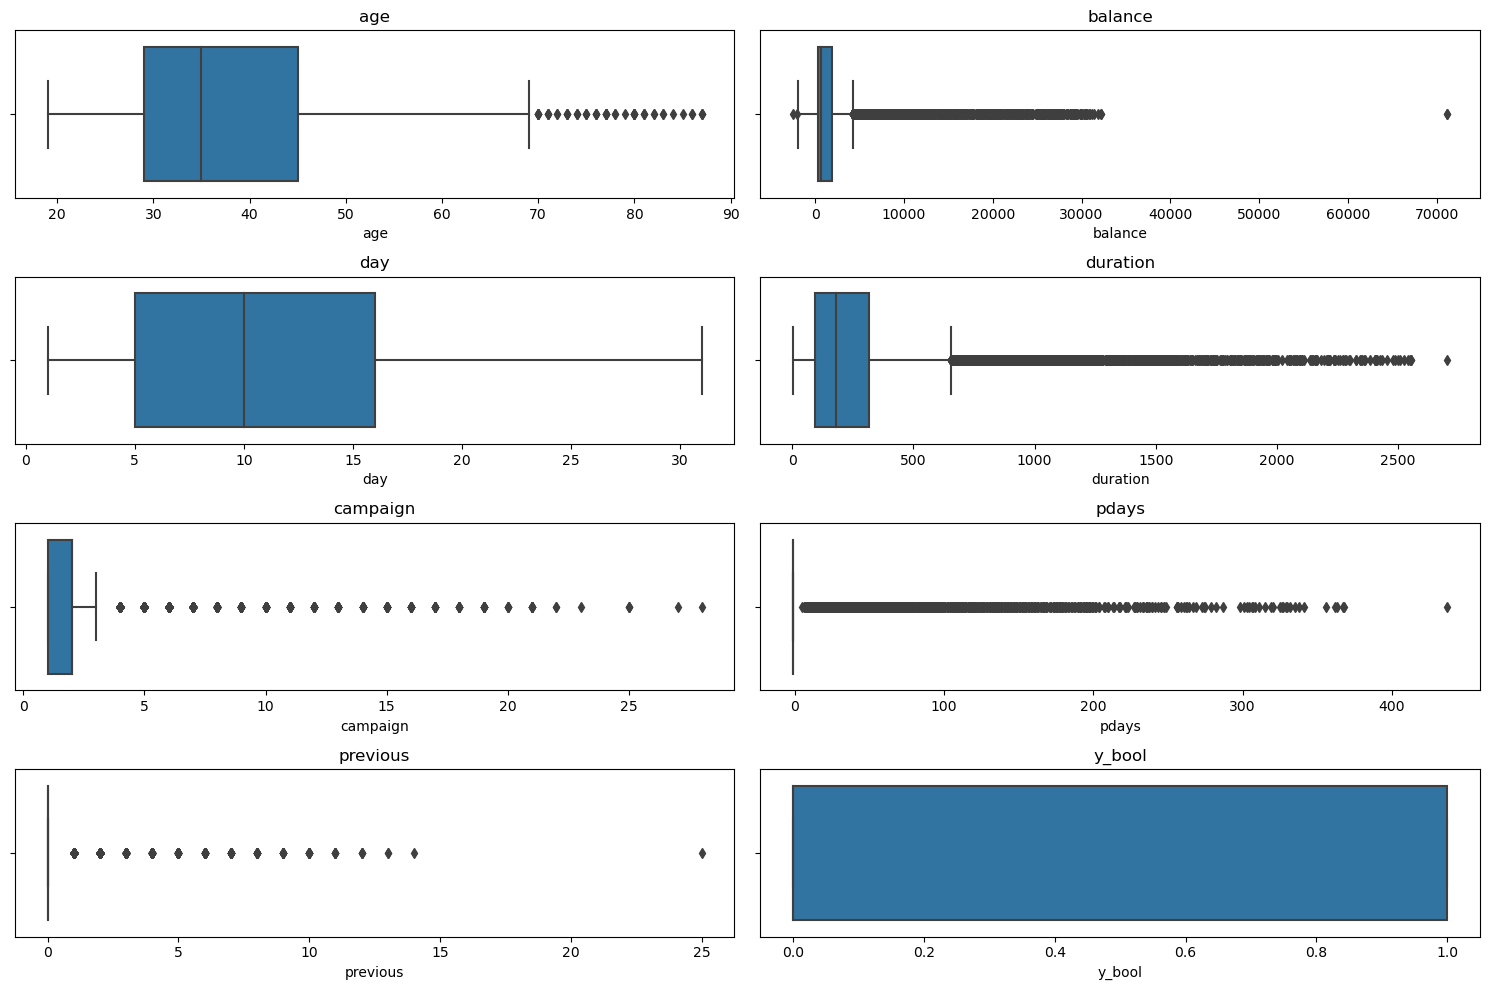

In [28]:
iterator = 1
for i in num_cols:
    plt.subplot(4,2,iterator)
    sns.boxplot(combined.loc[:,i])
    plt.title(i)
    iterator+=1
    
plt.tight_layout()
plt.show()

In [29]:
from sklearn.preprocessing import KBinsDiscretizer

In [30]:
kbins = KBinsDiscretizer(n_bins=4,encode='ordinal',strategy='uniform')
combined['age_bins']=kbins.fit_transform(combined[['age']])

In [31]:
combined.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_bool,profession,age_bins
0,51,admin.,married,tertiary,no,148,no,no,cellular,15,apr,263,2,-1,0,unknown,0.0,employed,1.0
1,55,blue-collar,married,secondary,no,7160,yes,no,unknown,4,may,315,1,-1,0,unknown,0.0,blue-collar,2.0
2,65,blue-collar,divorced,tertiary,no,2197,yes,no,cellular,12,may,102,2,-1,0,unknown,0.0,blue-collar,2.0
3,25,admin.,married,secondary,no,6658,yes,no,cellular,16,feb,197,1,-1,0,unknown,1.0,employed,0.0
4,36,services,married,secondary,no,1761,yes,no,cellular,19,sep,177,1,-1,0,success,0.0,blue-collar,1.0


In [32]:
tbl = pd.crosstab(combined.age_bins,combined.y_bool)
teststats,pvalue,df,exp_freq = stats.chi2_contingency(tbl)
print(pvalue)

7.913095873130406e-10


In [33]:
kbins.bin_edges_

array([array([19., 36., 53., 70., 87.])], dtype=object)

In [34]:
def bins(x):
    if (x<=19):
        return('Teens')
    elif (x<=36):
        return('Adult')
    elif (x<=53):
        return('Mature')
    else:
        return('Senior')

In [35]:
#Apply
combined['age_cat'] = combined.age.apply(bins)

In [36]:
tbl = pd.crosstab(combined.age_cat,combined.y_bool)
stats.chi2_contingency(tbl)[1]

3.1639967525897536e-11

In [37]:
combined.balance.describe()

count    30000.000000
mean      1608.013900
std       2989.866596
min      -2477.000000
25%        303.000000
50%        634.000000
75%       1880.000000
max      71188.000000
Name: balance, dtype: float64

In [38]:
#Convert -2477 to 0
def balanced(x):
    if x<0:
        return(0)
    else:
        return(x)

In [39]:
combined['balance']=combined.balance.apply(balanced)
combined.balance.describe()

count    30000.000000
mean      1626.014067
std       2978.325577
min          0.000000
25%        303.000000
50%        634.000000
75%       1880.000000
max      71188.000000
Name: balance, dtype: float64

In [40]:
# Make n-bins = 5

kbins = KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='quantile')

combined['balance_bins']=kbins.fit_transform(combined[['balance']])

In [41]:
tbl = pd.crosstab(combined.balance_bins,combined.y_bool)
teststats,pvalue,df,exp_freq = stats.chi2_contingency(tbl)
print(pvalue)

0.0008745599667551404


In [42]:
kbins.bin_edges_

array([array([    0. ,   236. ,   492. ,  1078.4,  2199. , 71188. ])],
      dtype=object)

In [43]:
combined.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_bool,profession,age_bins,age_cat,balance_bins
0,51,admin.,married,tertiary,no,148,no,no,cellular,15,apr,263,2,-1,0,unknown,0.0,employed,1.0,Mature,0.0
1,55,blue-collar,married,secondary,no,7160,yes,no,unknown,4,may,315,1,-1,0,unknown,0.0,blue-collar,2.0,Senior,4.0
2,65,blue-collar,divorced,tertiary,no,2197,yes,no,cellular,12,may,102,2,-1,0,unknown,0.0,blue-collar,2.0,Senior,3.0
3,25,admin.,married,secondary,no,6658,yes,no,cellular,16,feb,197,1,-1,0,unknown,1.0,employed,0.0,Adult,4.0
4,36,services,married,secondary,no,1761,yes,no,cellular,19,sep,177,1,-1,0,success,0.0,blue-collar,1.0,Adult,3.0


In [44]:
#Conver the Duration in Mins....
combined['duration']=combined.duration/60
combined.duration.describe()

count    30000.000000
mean         4.379814
std          4.764683
min          0.066667
25%          1.566667
50%          3.050000
75%          5.300000
max         45.050000
Name: duration, dtype: float64

- If the call Duration is more than 5min, y_bool count will be high

In [45]:
combined.loc[combined.duration<=5,'y_bool'].value_counts(normalize=True)

0.0    0.727913
1.0    0.272087
Name: y_bool, dtype: float64

In [46]:
#Drop the variables
newdata = combined.drop(['contact','job'],axis=1)


In [47]:
newdata.shape

(30000, 19)

<AxesSubplot:xlabel='y_bool,day'>

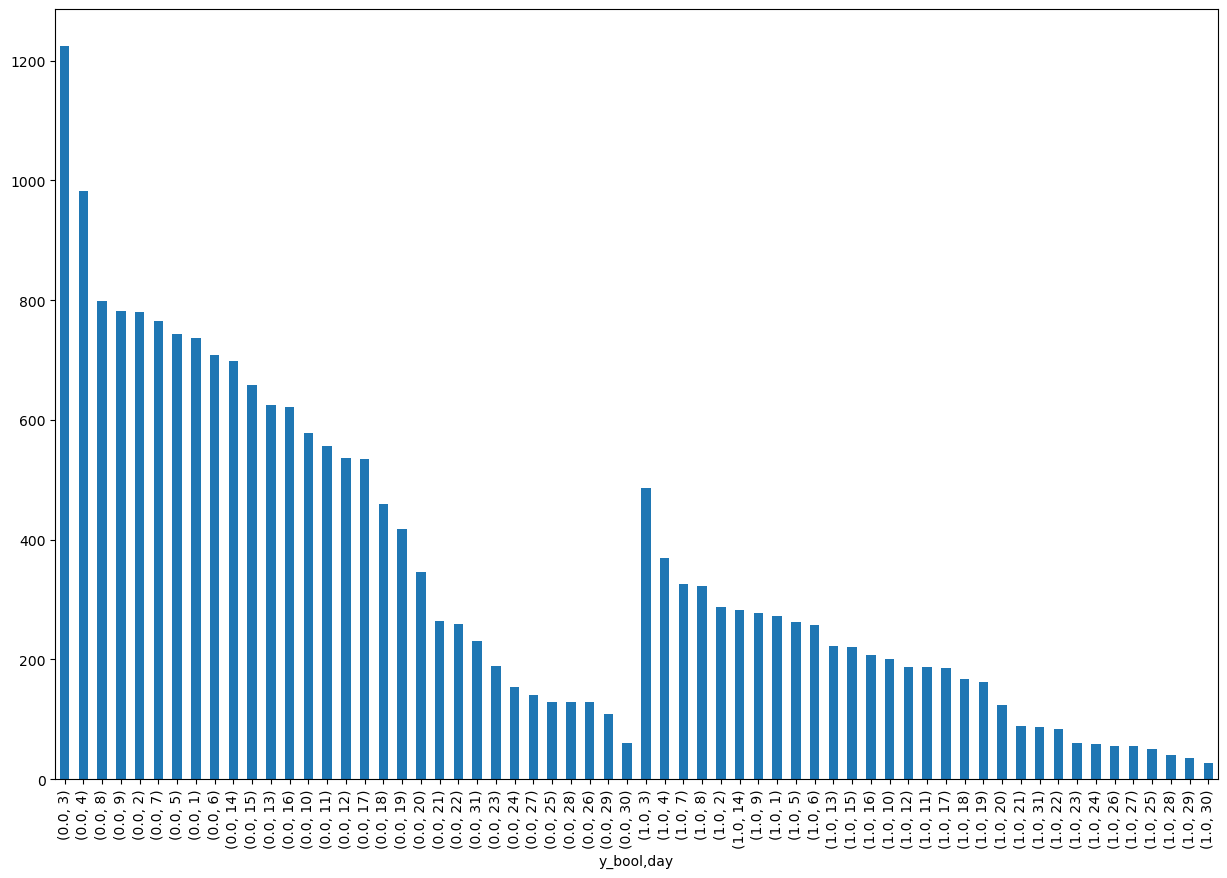

In [48]:
#Day Vs Target
newdata.groupby('y_bool')['day'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='y_bool,month'>

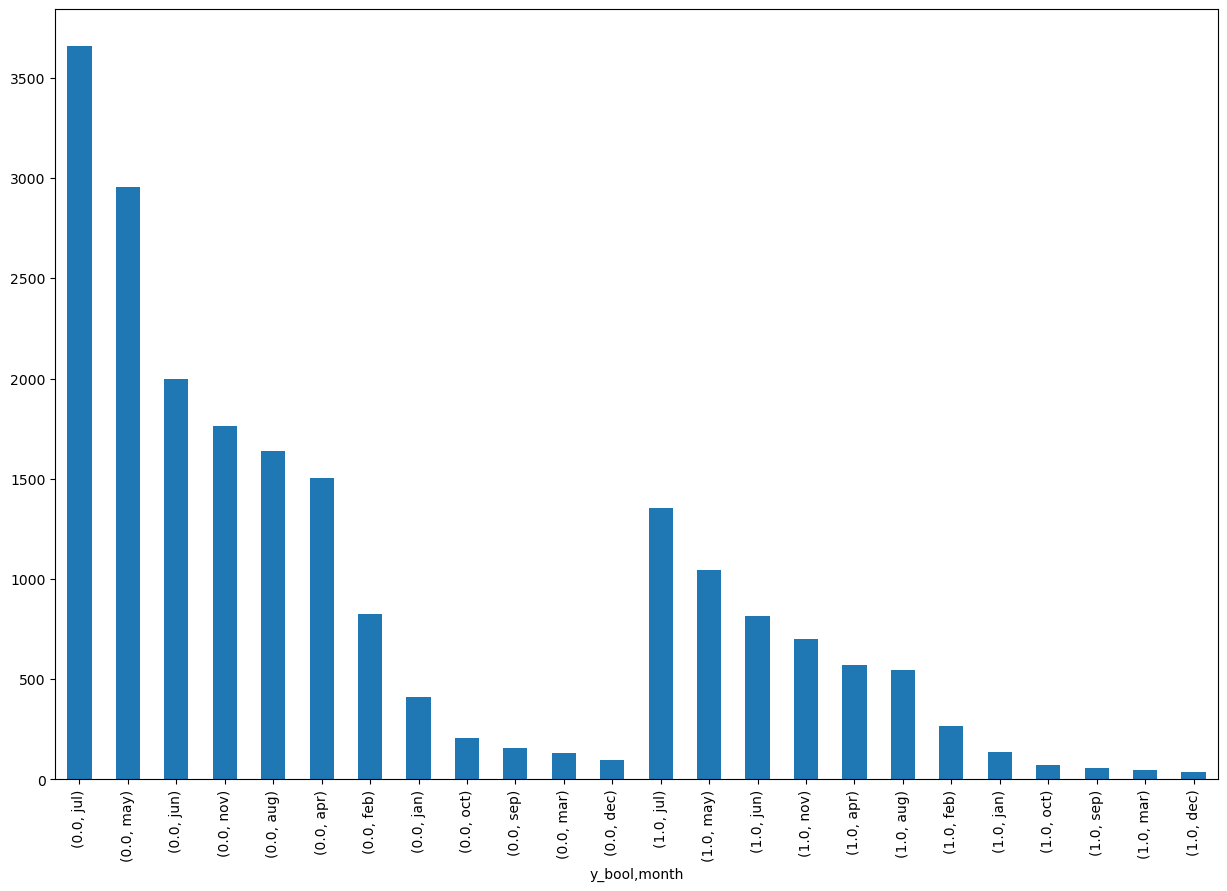

In [49]:
newdata.groupby('y_bool')['month'].value_counts().plot(kind='bar')

In [50]:
def months(x):
    if x in ['sep','oct','dec']:
        return('festive')
    elif x in ['apr','may','jun','jul','aug','nov']:
        return('deposits')
    else:
        return('no_deposits')

In [51]:
newdata['month_cat'] = newdata.month.apply(months)

In [52]:
newdata.head()

,age,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y_bool,profession,age_bins,age_cat,balance_bins,month_cat
0,51,married,tertiary,no,148,no,no,15,apr,4.383333,2,-1,0,unknown,0.0,employed,1.0,Mature,0.0,deposits
1,55,married,secondary,no,7160,yes,no,4,may,5.250000,1,-1,0,unknown,0.0,blue-collar,2.0,Senior,4.0,deposits
2,65,divorced,tertiary,no,2197,yes,no,12,may,1.700000,2,-1,0,unknown,0.0,blue-collar,2.0,Senior,3.0,deposits
3,25,married,secondary,no,6658,yes,no,16,feb,3.283333,1,-1,0,unknown,1.0,employed,0.0,Adult,4.0,no_deposits
4,36,married,secondary,no,1761,yes,no,19,sep,2.950000,1,-1,0,success,0.0,blue-collar,1.0,Adult,3.0,festive


In [53]:
newdata['month_cat'].unique()

array(['deposits', 'no_deposits', 'festive'], dtype=object)

In [54]:
tbl = pd.crosstab(newdata.month_cat,newdata.y_bool)
teststats,pvalue,df,exp_freq = stats.chi2_contingency(tbl)
print(pvalue)

0.10578918638603158


In [55]:
def months(x):
    if x in ['nov','oct','dec']:
        return('q4')
    elif x in ['apr','may','jun']:
        return('q2')
    elif x in ['jan','feb','mar']:
        return('q1')
    else:
        return('q3')

In [56]:
newdata['month_cat'] = newdata.month.apply(months)

In [57]:
tbl = pd.crosstab(newdata.month_cat,newdata.y_bool)
teststats,pvalue,df,exp_freq = stats.chi2_contingency(tbl)
print(pvalue)

0.04597093223395938


In [58]:
newdata.head()

,age,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y_bool,profession,age_bins,age_cat,balance_bins,month_cat
0,51,married,tertiary,no,148,no,no,15,apr,4.383333,2,-1,0,unknown,0.0,employed,1.0,Mature,0.0,q2
1,55,married,secondary,no,7160,yes,no,4,may,5.250000,1,-1,0,unknown,0.0,blue-collar,2.0,Senior,4.0,q2
2,65,divorced,tertiary,no,2197,yes,no,12,may,1.700000,2,-1,0,unknown,0.0,blue-collar,2.0,Senior,3.0,q2
3,25,married,secondary,no,6658,yes,no,16,feb,3.283333,1,-1,0,unknown,1.0,employed,0.0,Adult,4.0,q1
4,36,married,secondary,no,1761,yes,no,19,sep,2.950000,1,-1,0,success,0.0,blue-collar,1.0,Adult,3.0,q3


In [59]:
# Dropping day and month
newdata.drop(['day','month'],axis=1,inplace=True)

In [60]:
#Split the Data in train and test

newtrain = newdata.loc[0:train.shape[0]-1,:]
newtest = newdata.loc[train.shape[0]:,:]

newtest.drop('y_bool',axis=1,inplace=True)

In [61]:
#Convert target into integer...
newtrain['y_bool']=newtrain.y_bool.astype(int)

In [62]:
newtrain.shape,newtest.shape,train.shape,test.shape

((21000, 18), (9000, 17), (21000, 17), (9000, 16))

In [63]:
newtrain['age_bins']=newtrain.age_bins.astype(int)
newtrain['balance_bins']=newtrain.balance_bins.astype(int)
newtrain['y_bool'] = newtrain.y_bool.astype(int)

In [64]:
newtest['age_bins'] = newtest.age_bins.astype(int)
newtest['balance_bins'] = newtest.balance_bins.astype(int)

# Modeling

In [65]:
dummytrain = pd.get_dummies(newtrain,drop_first=True)
dummytest =pd.get_dummies(newtest,drop_first=True)

In [66]:
x = dummytrain.drop('y_bool',axis=1)
y = dummytrain.y_bool

### Logistic Regression Model

In [67]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.model_selection import StratifiedKFold

In [68]:
kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

pred = []
for train_index,test_index in kfold.split(x,y):
    xtrain = x.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(lr.fit(xtrain,ytrain).predict(dummytest))

In [69]:
finalpred = np.abs(pd.DataFrame(pred).T.mode(axis = 1)[0])

In [70]:
pd.DataFrame(pred).T.mode()

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0


In [71]:
submission = pd.DataFrame({'y_bool':finalpred})

submission.to_csv("LR_Model.csv", index = False) 

In [72]:
cd

C:\Users\Chaitanya


### Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf = RandomForestClassifier()

In [75]:
pred = []
for train_index,test_index in kfold.split(x,y):
    xtrain = x.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(rf.fit(xtrain,ytrain).predict(dummytest))

In [76]:
finalpred = np.abs(pd.DataFrame(pred).T.mode(axis = 1)[0])

In [77]:
submission = pd.DataFrame({'y_bool':finalpred})

submission.to_csv("RFModel.csv", index = False) 

### Gradient Boosting

In [78]:
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier

In [79]:
gbm = GradientBoostingClassifier()

In [80]:
pred = []
for train_index,test_index in kfold.split(x,y):
    xtrain = x.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(gbm.fit(xtrain,ytrain).predict(dummytest))

In [81]:
finalpred = np.abs(pd.DataFrame(pred).T.mode(axis = 1)[0])

In [82]:
submission = pd.DataFrame({'y_bool':finalpred})

submission.to_csv("GBMModel.csv", index = False) 

### SMOTE 

In [83]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
smotex,smotey =smote.fit_resample(x,y)

In [84]:
pred = []
for train_index,test_index in kfold.split(smotex,smotey):
    xtrain = smotex.loc[train_index]
    ytrain = smotey.loc[train_index]
    pred.append(lr.fit(xtrain,ytrain).predict(dummytest))

In [85]:
finalpred = np.abs(pd.DataFrame(pred).T.mean(axis = 1))

In [86]:
submission = pd.DataFrame({'y_bool':finalpred})

submission.to_csv("SMOTE_LRModel1.csv", index = False) 

### Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
dt = DecisionTreeClassifier()

In [89]:
pred = []
for train_index,test_index in kfold.split(x,y):
    xtrain = x.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(dt.fit(xtrain,ytrain).predict(dummytest))

In [90]:
finalpred = np.abs(pd.DataFrame(pred).T.mode(axis = 1)[0])

In [91]:
submission = pd.DataFrame({'y_bool':finalpred})

submission.to_csv("DEcision_tree.csv", index = False) 

In [93]:
!pip install mlxtend

  Using cached mlxtend-0.21.0-py2.py3-none-any.whl (1.3 MB)


# Sequential Feature Selector


In [94]:
from mlxtend.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(estimator=RandomForestClassifier(),k_features='best',forward=True)
sfs.fit(smotex,smotey)


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

SequentialFeatureSelector(estimator=RandomForestClassifier(),
                          k_features=(1, 27), scoring='accuracy')

In [96]:
!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 1.5 MB/s eta 0:00:00


In [97]:
# light Gbm 
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()

kfold = StratifieldKFold(n_splits = 5,shuffle = True,random_state = 42)

pred = []
for train_index,test_index in kfold.split(x,y):
    xtrain = x.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(dt.fit(xtrain,ytrain).predict(dummytest))
    
finalpred = np.abs(pd.DataFrame(pred).T.mode(axis = 1)[0])
submission = pd.DataFrame({'y_bool':finalpred})

submission.to_csv("lightgbmodel.csv", index = False) 

NameError: name 'StratifieldKFold' is not defined